In [1]:
import sympy as sp
import minterpy as mp
import numpy as np
from minterpy.pointcloud_utils import *

from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

import torch
import torchvision
from torchvision import transforms, datasets

import random
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcdefaults()

import os
from operator import itemgetter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import ot

from sklearn.neighbors import NearestNeighbors

import ripser
import persim
from persim import plot_diagrams

from operator import itemgetter


#do pip installs as follows to use vedo for plotting point clouds
#pip install vedo
#pip install ipyvtklink

import numpy as np
from vedo import *

import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
import ripser
import persim
from persim import plot_diagrams
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw



In [3]:
def _compute_distance_matrix(x, p=2):
    x_flat = x.view(x.size(0), -1)

    distances = torch.norm(x_flat[:, None] - x_flat, dim=2, p=p)

    return distances

tr1 : 200 training points were used
tr2 : 50 training points were used
tr3 : 100 training points were used

# select trial no

In [43]:
trial_no = 11

In [44]:
import random

In [45]:
rec_bAE = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/mlp_ae.pt')
rec_legendre_rAE = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/Reg on legendre nodes.pt')
model_convAE = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/conv.pt')
model_contra = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/contra.pt')
model_mlpVAE = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/mlp_vae.pt')
model_cnnVAE = torch.load('/media/chethan/New Volume/Thesis/circle_torus_autoencoder_experiments/3d_torus_saved/plot_results_1024/tr'+str(trial_no)+'/cnn_vae.pt')


In [46]:
rec_bAE.shape

(2000, 3)

# MLP AE Embedding

In [58]:
x_t = rec_bAE[:,0]
y_t = rec_bAE[:,1]
z_t = rec_bAE[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

# Legendre AE-REG embedding 

In [57]:
x_t = rec_legendre_rAE[:,0]
y_t = rec_legendre_rAE[:,1]
z_t = rec_legendre_rAE[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

# ConvAE Embedding

In [56]:
x_t = model_convAE[:,0]
y_t = model_convAE[:,1]
z_t = model_convAE[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

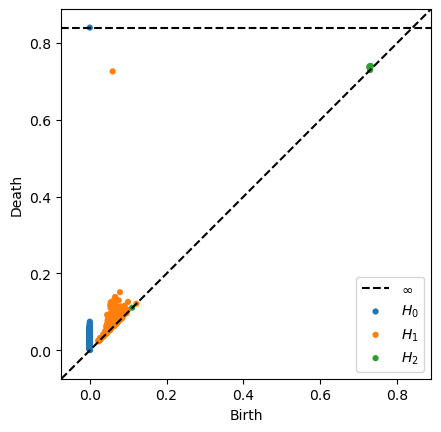

In [102]:
dist_matrix = _compute_distance_matrix(torch.tensor(model_convAE), p=2)
diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

# Contractive AE Embedding

In [55]:
x_t = model_contra[:,0]
y_t = model_contra[:,1]
z_t = model_contra[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

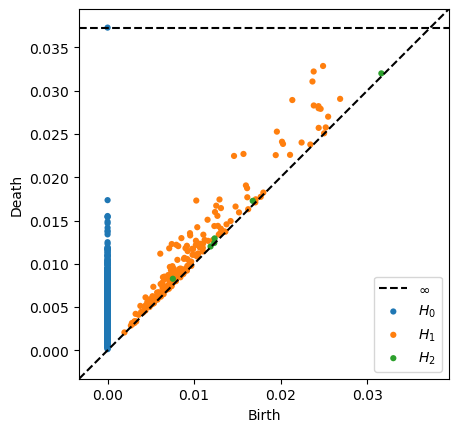

In [104]:
dist_matrix = _compute_distance_matrix(torch.tensor(model_contra), p=2)
diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

# MLP VAE Embedding

In [54]:
x_t = model_mlpVAE[:,0]
y_t = model_mlpVAE[:,1]
z_t = model_mlpVAE[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

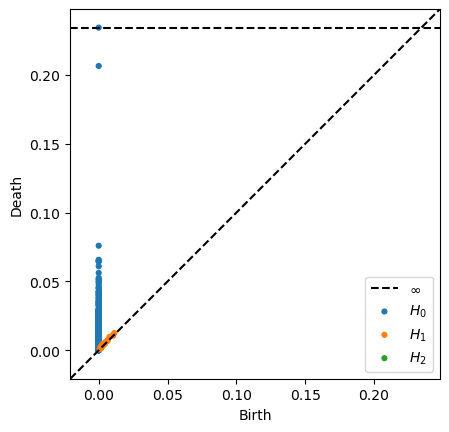

In [106]:
dist_matrix = _compute_distance_matrix(torch.tensor(model_mlpVAE), p=2)
diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

# CNN VAE Embedding

In [53]:
x_t = model_cnnVAE[:,0]
y_t = model_cnnVAE[:,1]
z_t = model_cnnVAE[:,2]


plot_points = [x_t,y_t,z_t]
Points(plot_points).show(axes=0)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

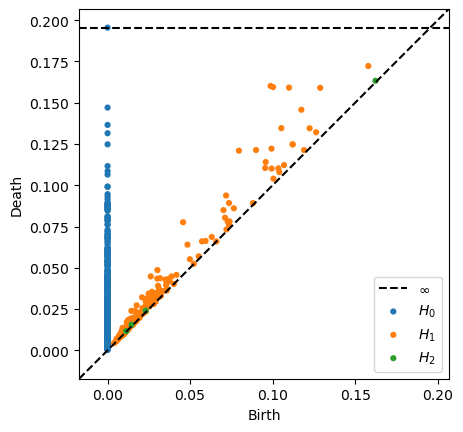

In [108]:
dist_matrix = _compute_distance_matrix(torch.tensor(model_betaVAE), p=2)
diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)